# MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem with Python.

 By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; August 2017<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

## I Introduction:

This project presents an application of several supervised learning algorithms to the classification problem, evaluating and selecting the best of them according to a precision measurement (accuracy_score) and the scikit-learn Python library.

I am going to be using the famous iris flowers dataset. The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters.  This columns are the variables (features): SepalLength; SepalWidth; PetalLength; PetalWidth. 

The fifth column is the species of the flower observed. All observed flowers belong to one of three species: Iris-setosa; Iris-versicolor; Iris-virginica.  

You can learn more about this dataset on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).  

The dataset can be gotten from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris), but in this project I will use a copy of this dataset wich I am going to download from [here](http://www.arqmain.net/MLearning/Datasets/iris.csv).

By the end of this project we will have covered the following topics, in a very specific way (of course):

* A way to import a dataset from a website to python.
* A way to use pandas library to analyze the datase.
* A way to use seaborn and matplotlib to quickly plot charts that could help us to understand the problem.
* A way to use Machine Learning(ML) using scikit-learn to perform predictive analysis.
* A way to compare different ML models, select one from them and present predictions for a new set of data.
* A way to use analytical as well as technical skills to create an end-to-end project.


## II Import Python libraries

Let’s import all of the modules, functions and objects we are going to use.

In [1]:
# Load libraries
from __future__ import print_function
%matplotlib inline

import os
import subprocess

import pandas
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


## III Loading and Checking the Data

The following function first tries to read the data locally, using pandas. If a local iris.csv is not found, pandas is used to grab the data from a url and a local copy is saved for future runs.

The dataset can be gotten from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris), but in this project I will use a copy of this dataset wich I am going to download from [here](http://www.arqmain.net/MLearning/Datasets/iris.csv).

Be careful by the time you select the iris dataset you will use to run the function below.  If you chose the UCI Machine Learning Repository dataset or from another www place, you will have to verify that the dataset has an equaly column format. If not, you will probably not be able to use this function at the first try.

Of course, you can try your own way of reading the data or try a classic one like the following:


>url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

>names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

>dataset = pandas.read_csv(url, names=names) 

In [2]:
# Read the data 

def get_iris_data():
    """Get the iris data, from local csv or pandas repo."""
    if os.path.exists("iris.csv"):
        print("-- iris.csv found locally")
        df = pandas.read_csv("iris.csv", index_col=0)
    else:
        print("-- trying to download from my web site")
        fn = "http://www.arqmain.net/MLearning/Datasets/iris.csv"
        try:
            df = pandas.read_csv(fn)
        except:
            exit("-- Unable to download iris.csv")

        with open("iris.csv", 'w') as f:
            print("-- writing to local iris.csv file")
            df.to_csv(f)

    return df


In [3]:
# Load dataset
df = get_iris_data()


-- iris.csv found locally


## IV Checking the data

Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis. So, we  will have a look at the dataset to answer the following questions:

* Is there anything wrong with the data?
* Is there any particularity with the data?
* Do I need to fix or remove any of the data?


In [4]:
# verify the data type of dataset
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [5]:
# print head and tail rows from dataset df
print("* df.head()", df.head(), sep="\n", end="\n\n")
print("* df.tail()", df.tail(), sep="\n", end="\n\n")


* df.head()
   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

* df.tail()
     SepalLength  SepalWidth  PetalLength  PetalWidth         Species
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica



The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. 

Each row following the first one represents an entry for a flower: four measurements and one class, which tells us the species of the flower.

In [6]:
# shape
print(df.shape)


(150, 5)


This is exactly the result we are looking for. We should see 150 instances (rows) and 5 attributes (columns) as an answer.

<b><u>How about missing values?</u></b>

One of the first things we should look for is missing data. We will assume that 'NA' is the code into the dataset to represent a missing measurement.  This code must be verified in dataset to be used in each project. 

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [7]:
# tell pandas that 'NA' means missing value
df = pandas.read_csv('iris.csv', na_values=['NA'], index_col=0)


Now pandas knows to treat rows with 'NA' as missing values. Let's take a look if we have rows with missing values:


In [8]:
#  tell pandas to look for rows with missing values
df[(df['SepalLength'].isnull()) |
              (df['SepalWidth'].isnull()) |
              (df['PetalLength'].isnull()) |
              (df['PetalWidth'].isnull()) |
              (df['Species'].isnull())]


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species


This is exactly the result we are looking for. If the dataset has no missing value in it, we should get only the names of the variables as the output for the script above, nothing more.


In [9]:
# get some information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [10]:
# count the number of non-NA values in the dataset
print(df.count())


SepalLength    150
SepalWidth     150
PetalLength    150
PetalWidth     150
Species        150
dtype: int64


In [11]:
# get info about the columns/attributes of the dataset
print(df.columns)


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


## V Summarize the dataset

Let’s get into some statistical analysis with the dataset. This initial process will aid us to get some basic understanding of the dataset.

In [12]:
# get the sum of values for each column/attribute in the dataset
print(df.sum())


SepalLength                                                876.5
SepalWidth                                                 458.1
PetalLength                                                563.8
PetalWidth                                                 179.8
Species        Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object


In [13]:
# get the mean values of each column/attribute in the dataset
print(df.mean())


SepalLength    5.843333
SepalWidth     3.054000
PetalLength    3.758667
PetalWidth     1.198667
dtype: float64


In [14]:
# get the median values of each column/attribute in the dataset
print(df.median())


SepalLength    5.80
SepalWidth     3.00
PetalLength    4.35
PetalWidth     1.30
dtype: float64


In [15]:
# class distribution
print(df.groupby('Species').size())


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


We can see that each class has the same number of instances (50 or 33% of the dataset).

In [16]:
# get the summary statistics of the dataset
print(df.describe())


       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [17]:
# get the summary statistics of the dataset by Species
print(df.groupby('Species').describe())

                       PetalLength  PetalWidth  SepalLength  SepalWidth
Species                                                                
Iris-setosa     count    50.000000   50.000000    50.000000   50.000000
                mean      1.464000    0.244000     5.006000    3.418000
                std       0.173511    0.107210     0.352490    0.381024
                min       1.000000    0.100000     4.300000    2.300000
                25%       1.400000    0.200000     4.800000    3.125000
                50%       1.500000    0.200000     5.000000    3.400000
                75%       1.575000    0.300000     5.200000    3.675000
                max       1.900000    0.600000     5.800000    4.400000
Iris-versicolor count    50.000000   50.000000    50.000000   50.000000
                mean      4.260000    1.326000     5.936000    2.770000
                std       0.469911    0.197753     0.516171    0.313798
                min       3.000000    1.000000     4.900000    2

We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

Anyway, tables like this are rarely useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

## VI Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.

Data Visualization is one of the most important step in any project. This is because only from graphs and charts, our brain could visualize those 150 rows of raw data. Data Visualization tools give us the power to explore hidden patterns in the dataset.


### 6.1 Univariate plots to better understand each attribute.

Given that the input variables are numeric, we can create box and whisker plots of each. We can also create a histogram of each input variable to get an idea of the distribution.

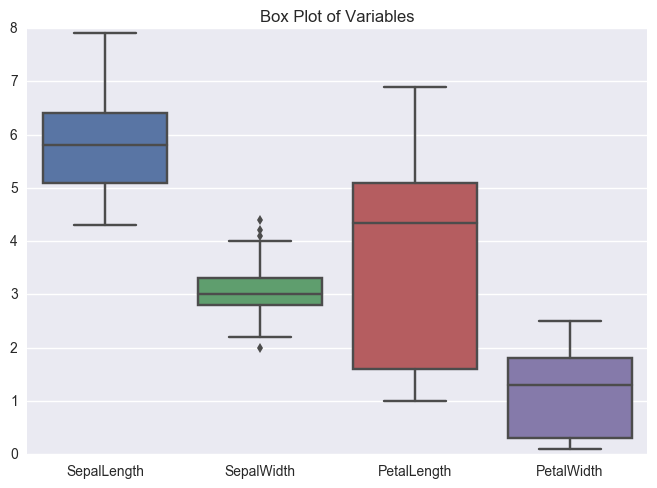

In [19]:
# box and whisker plots of each variable
sns.boxplot(data=df, orient="v").set_title("Box Plot of Variables");
sns.plt.show()


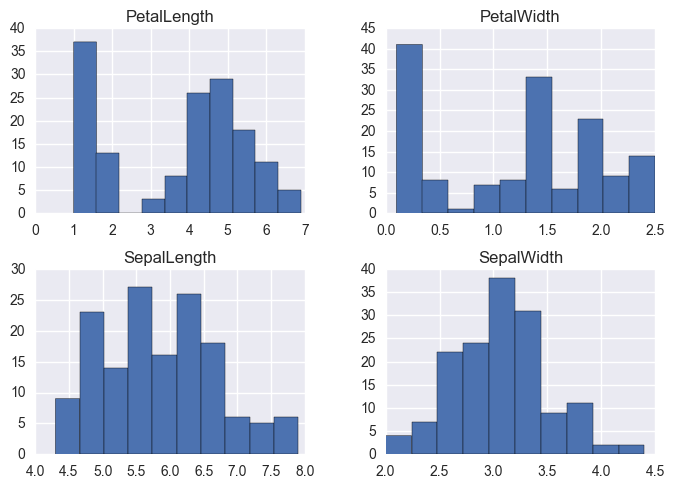

In [20]:
# histograms
df.hist()
plt.show()

Even though two of the input variables are clearly asymmetric, it looks like perhaps the other two have a Gaussian distribution. This may be useful to note if we are planning to use algorithms that require this assumption.

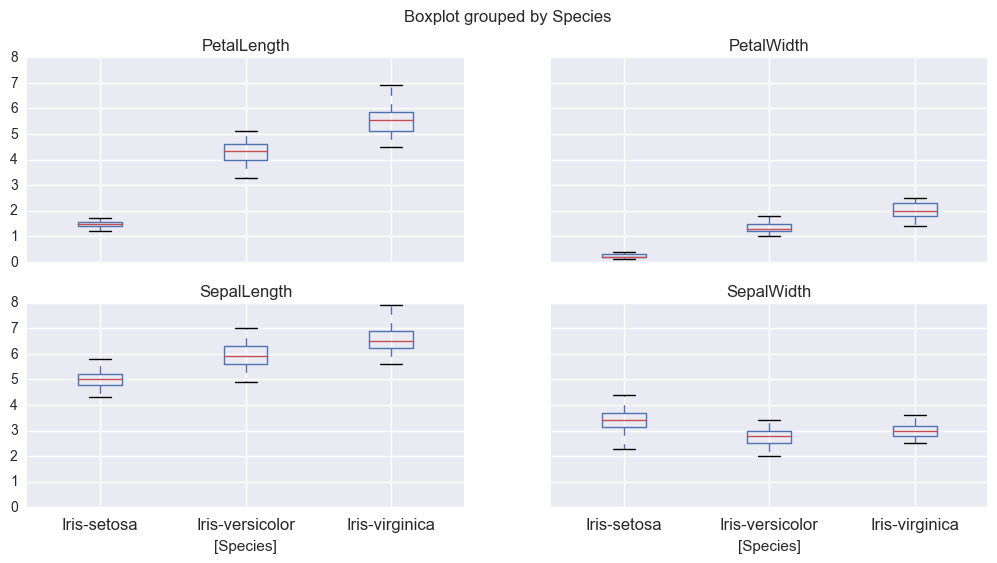

In [21]:
# box and whisker plots of each variable by species
df.boxplot(by="Species", figsize=(12, 6))
plt.show()


### 6.2 Multivariate plots to better understand the relationships between attributes.

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

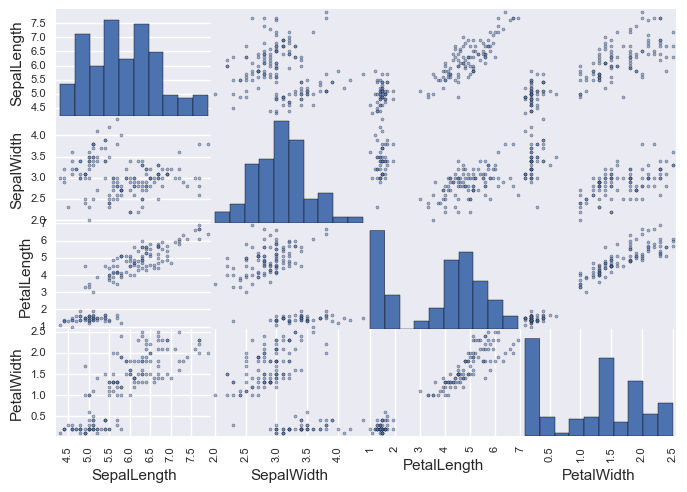

In [22]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

We can note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.  

At the same time, there's something strange going with the petal measurements. Maybe it's something to do with the different Iris types. 


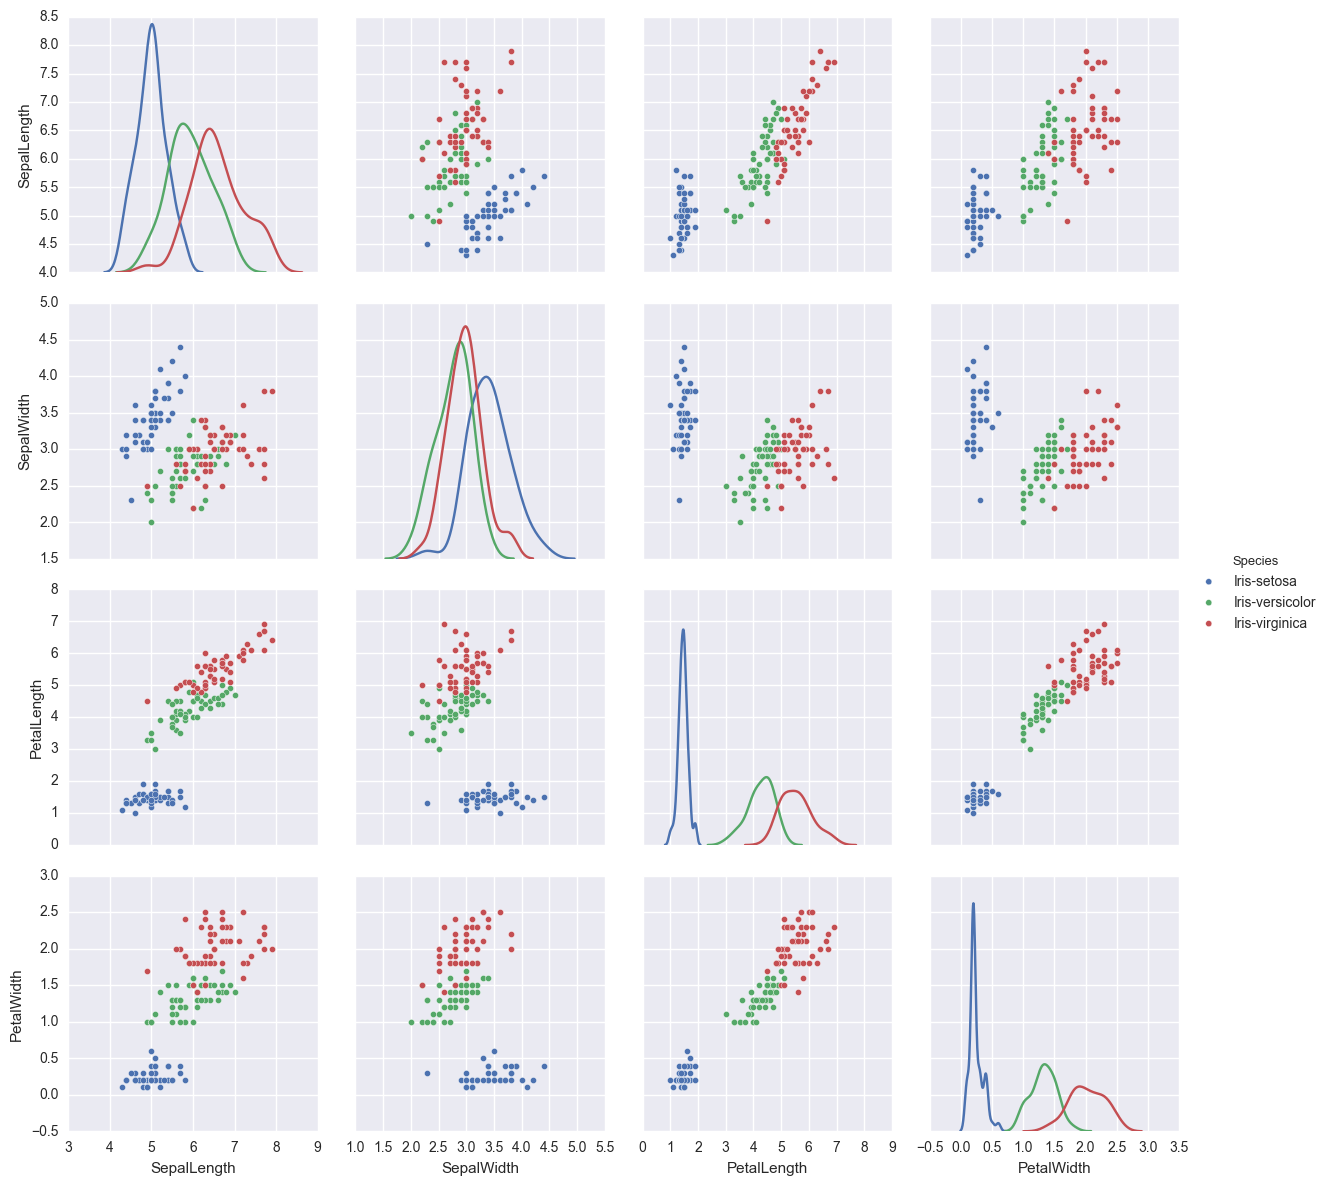

In [23]:
# scatter plot matrix by species
sns.pairplot(df, hue="Species", size=3, diag_kind="kde")
sns.plt.show()


From the above scatterplot matrix, we could see that all variables are highly correlated. So, we can’t separate those values just by drawing a straight line or fit a simple curve. 

Now, adding colors to the plot let three groups of data clearly appears. Those groups correspond to the species of flower we know they are in the dataset.

By the way, the strange distribution of the petal measurements appears to be given that the different species. In fact, this is a very good situation to take place for our project.  Now we can see that the petal measurements will make it easy for the classification algorithms to distinguish between <i><u>Iris-setosa</u></i> and the other <i><u>Iris</u></i> types.

On the other hand, distinguishing <i><u>Iris-versicolor</u></i> and <i><u>Iris-virginica</u></i> should be more difficult becouse of their measurements overlap.

Finally, there are also correlations between <i><u>PetalLength</u></i> and <i><u>PetalWidth</u></i>, as well as <i><u>SepalLength</u></i> and <i><u>SepalWidth</u></i>. According with biology guys they assure, this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals.


## VII Machine Learning Models

After getting enough information and visualizing the dataset, let’s make our hands dirty by constructing Machine Learning (ML) models to perform predictive analysis. In this project, we will explore different kinds of ML models that gives different accuracies on the same dataset. We will also explore how to split training and testing data from the original dataset, so that we can make the model learn from the training data and predict on the test data.

Here is what we are going to cover in this step:

* Separate out a validation dataset.
* Set-up the test harness to use 10-fold cross validation.
* Build 7 different models to predict species from flower measurements
* Select the best model.

### 7.1 Train Dataset, Validation Dataset and Test Harness

We will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data (validation dataset).

We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [24]:
# convert the dataframe into a matrix
dataArray = df.values


In [25]:
# split the input features and output variable
X = dataArray[:,0:4]
Y = dataArray[:,4]


In [26]:
# split training and testing dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

We set the "seed" fixed so that it ensures the results are directly comparable next time we run the models.

In [27]:
# print the the shape of train and validation arrays
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)


(120, 4)
(30, 4)
(120,)
(30,)


In [28]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


We are using the metric of "accuracy" to evaluate models. We will be using the scoring variable when we run build and evaluate each model next.


### 7.2 Build Models

Sofar, we don’t know which algorithms would be good on this project or what configurations to use. Anyway, we have gotten some tips from the plots that the species are partially linearly separable in some dimensions. As a result, we should expect generally good results.

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Random Forest Classifier (RF).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

All models incorporated here are presented and compared in their default version provided by the sklearn library.

We have considered linear (LR and LDA), nonlinear (KNN, CART, RF, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

All models incorporated here are presented and compared in their default version provided by the sklearn library. 

In [29]:
# prepare the models - {LR, LDA, KNN, CART, RF, NB, SVM}
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
      

In [30]:
# fit the models and evaluate it
results = []
names = []

# evaluate each model using 10-FOLD cross validation
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
RF: 0.958333 (0.041667)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


### 7.3 Select Best Model

We now have 7 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

On evaluating all the models, we find that SVM achieves a training accuracy of 0.991667 (99.17%). As we were expecting all models have good accuracy scores, but among them SVM is the best one. 

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).


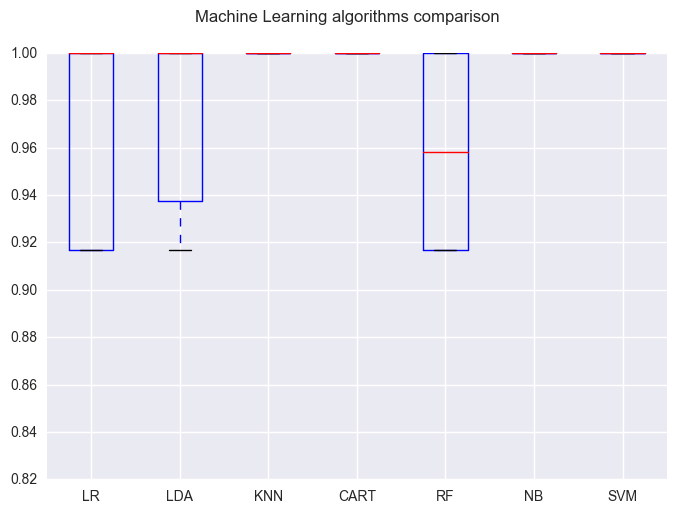

In [31]:
# boxplots for ML algorithm comparison
fig = plt.figure()
fig.suptitle('Machine Learning algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### 7.4 Make Predictions

The SVM algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.


In [32]:
# create the model
model = SVC()

# fit the model
model.fit(X_train, Y_train)

# make predictions on the validation data
predictions = model.predict(X_validation)

# compute the overall accuracy and display the classification report
print("Model --> Support Vector Machine​ (SVM)")
print("Overall Accuracy: {}".format(accuracy_score(Y_validation, predictions) * 100))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


Model --> Support Vector Machine​ (SVM)
Overall Accuracy: 93.33333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



Precision, recall and f1-score are metrics to measure the accuracy of classification models.   A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).  Anyway, I am working my way to developing a short project where I will cover this topic in a short precise and practical way.


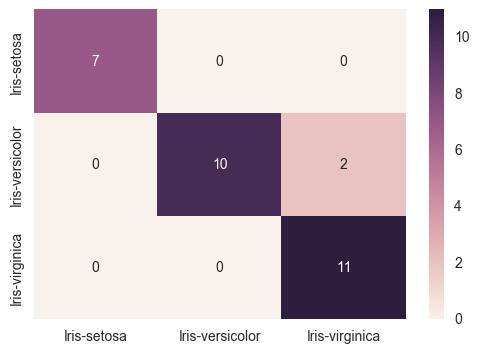

In [33]:
# plot confusion matrix and display the heatmap
%matplotlib inline
cm = confusion_matrix(Y_validation, predictions)
sns.heatmap(cm,
            annot=True,
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.figure(figsize=(3,3))
sns.plt.show()


In [34]:
# make prediction on a new test data - (SepalLength, SepalWidth, PetalLength, PetalWidth)
new_data = [(5.1, 3.5, 1.4, 0.2), (6.7, 3.0, 5.2, 2.3), (6.2, 3.0, 5.1, 2.3)]

# convert the list of tuples to numpy array
new_array = np.asarray(new_data)

# the output labels
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

# make prediction
prediction = model.predict(new_array)

# get the no.of.test cases used
no_of_test_cases, cols = new_array.shape


In [35]:
# show the result
for i in range(no_of_test_cases):
    print("Iris FLOWER with SepalLength= {}, SepalWidth= {}, PetalLength= {}, PetalWidth= {}, will be --> {}".format(new_data[i][0], new_data[i][1], new_data[i][2], new_data[i][3], prediction[i]))
    

Iris FLOWER with SepalLength= 5.1, SepalWidth= 3.5, PetalLength= 1.4, PetalWidth= 0.2, will be --> Iris-setosa
Iris FLOWER with SepalLength= 6.7, SepalWidth= 3.0, PetalLength= 5.2, PetalWidth= 2.3, will be --> Iris-virginica
Iris FLOWER with SepalLength= 6.2, SepalWidth= 3.0, PetalLength= 5.1, PetalWidth= 2.3, will be --> Iris-virginica


## VIII Conclusion

This project provides an introduction to get started with predictive analysis using Python. The idea here is to provide a basic understanding of getting started with a machine learning problem and how to use data visualization to understand a problem better.

Hitting at the right machine learning algorithm is the ideal approach to achieve higher accuracy. But, it is easier said than done.

Improving the models can be done by tuning their parameters. Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier.

Enhancing a model performance can be challenging at times. You try all the strategies and algorithms that you’ve learnt. Yet, you fail at improving the accuracy of your model. You feel helpless and stuck. 

After having a post graduate degree in STAT, I’ve always preferred to first learn practically than digging theories. Learn the basic, applied data, get experience and then try to learn more theory if you still needed. I advise improving your learning about these methods by practicing and practicing and practicing trying to work with data as much as you can.

Finally, all models incorporated here are presented and compared to their default version provided by the sklearn library. This project can be used as a template that you can use on your dataset as a first approximation of your final selected model.


 <hr>
    By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; August 2017<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]